In [8]:
import numpy as np
import pandas as pd

# Given function
def given_function(x):
    return 25 * x / (x**4 + 14)

# Interval and step size
x_values = np.arange(0, 4.1, 0.4)
y_values = given_function(x_values)

# Tabulate the function
table = pd.DataFrame({'x': x_values, 'y': y_values})
table


,x,y
0,0.0,0.000000
1,0.4,0.712982
2,0.8,1.387964
3,1.2,1.866414
4,1.6,1.946131
5,2.0,1.666667
6,2.4,1.271790
7,2.8,0.927575
8,3.2,0.673074
9,3.6,0.494610


In [9]:
from numpy.polynomial.polynomial import Polynomial

# Fit linear and quadratic approximations using least squares
linear_coef = np.polyfit(x_values, y_values, 1)
quadratic_coef = np.polyfit(x_values, y_values, 2)

# Define the approximating polynomial functions
linear_approx = np.poly1d(linear_coef)
quadratic_approx = np.poly1d(quadratic_coef)

# Calculate the approximated y values for each approximation
linear_y_values = linear_approx(x_values)
quadratic_y_values = quadratic_approx(x_values)

# Calculate the root-mean-square deviation for each approximation
rms_linear = np.sqrt(np.mean((y_values - linear_y_values)**2))
rms_quadratic = np.sqrt(np.mean((y_values - quadratic_y_values)**2))

# Create the approximations and RMS deviations in a DataFrame
approximations = pd.DataFrame({
    'x': x_values,
    'y_true': y_values,
    'y_linear': linear_y_values,
    'y_quadratic': quadratic_y_values,
    'rms_linear': rms_linear,
    'rms_quadratic': rms_quadratic
})

approximations


,x,y_true,y_linear,y_quadratic,rms_linear,rms_quadratic
0,0.0,0.000000,1.197885,0.294881,0.604992,0.288683
1,0.4,0.712982,1.164082,0.802881,0.604992,0.288683
2,0.8,1.387964,1.130280,1.190480,0.604992,0.288683
3,1.2,1.866414,1.096477,1.457678,0.604992,0.288683
4,1.6,1.946131,1.062674,1.604476,0.604992,0.288683
5,2.0,1.666667,1.028871,1.630873,0.604992,0.288683
6,2.4,1.271790,0.995068,1.536870,0.604992,0.288683
7,2.8,0.927575,0.961265,1.322466,0.604992,0.288683
8,3.2,0.673074,0.927462,0.987662,0.604992,0.288683
9,3.6,0.494610,0.893659,0.532457,0.604992,0.288683


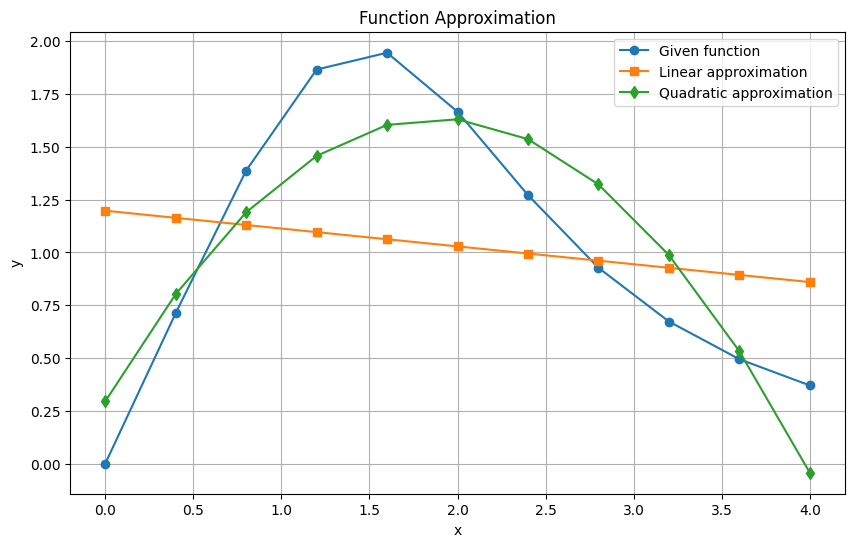

,Approximation,RMS
0,Linear,0.604992
1,Quadratic,0.288683


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given function
def given_function(x):
    return 25 * x / (x**4 + 14)

# Interval and step size
x_values = np.arange(0, 4.1, 0.4)
y_values = given_function(x_values)

# Fit linear and quadratic approximations using least squares
linear_coef = np.polyfit(x_values, y_values, 1)
quadratic_coef = np.polyfit(x_values, y_values, 2)

# Define the approximating polynomial functions
linear_approx = np.poly1d(linear_coef)
quadratic_approx = np.poly1d(quadratic_coef)

# Calculate the approximated y values for each approximation
linear_y_values = linear_approx(x_values)
quadratic_y_values = quadratic_approx(x_values)

# Calculate the root-mean-square deviation for each approximation
rms_linear = np.sqrt(np.mean((y_values - linear_y_values)**2))
rms_quadratic = np.sqrt(np.mean((y_values - quadratic_y_values)**2))

# Create the approximations and RMS deviations in a DataFrame
approximations = pd.DataFrame({
    'x': x_values,
    'y_true': y_values,
    'y_linear': linear_y_values,
    'y_quadratic': quadratic_y_values,
    'rms_linear': [rms_linear]*len(x_values),
    'rms_quadratic': [rms_quadratic]*len(x_values)
})

# Round RMS values to three decimal places
approximations['rms_linear'] = approximations['rms_linear'].round(3)
approximations['rms_quadratic'] = approximations['rms_quadratic'].round(3)

# Determine the best approximation by the smallest RMS deviation
best_approximation = 'linear' if rms_linear < rms_quadratic else 'quadratic'

# Plot the given function and both approximations
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label='Given function')
plt.plot(x_values, linear_y_values, 's-', label='Linear approximation')
plt.plot(x_values, quadratic_y_values, 'd-', label='Quadratic approximation')
plt.title('Function Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Output the RMS deviations and the best approximation
rms_results = pd.DataFrame({
    'Approximation': ['Linear', 'Quadratic'],
    'RMS': [rms_linear, rms_quadratic]
})

rms_results

In [11]:
print(best_approximation)
approximations


quadratic


,x,y_true,y_linear,y_quadratic,rms_linear,rms_quadratic
0,0.0,0.000000,1.197885,0.294881,0.605,0.289
1,0.4,0.712982,1.164082,0.802881,0.605,0.289
2,0.8,1.387964,1.130280,1.190480,0.605,0.289
3,1.2,1.866414,1.096477,1.457678,0.605,0.289
4,1.6,1.946131,1.062674,1.604476,0.605,0.289
5,2.0,1.666667,1.028871,1.630873,0.605,0.289
6,2.4,1.271790,0.995068,1.536870,0.605,0.289
7,2.8,0.927575,0.961265,1.322466,0.605,0.289
8,3.2,0.673074,0.927462,0.987662,0.605,0.289
9,3.6,0.494610,0.893659,0.532457,0.605,0.289
